In [163]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

with open('starwars-episode-2-interactions-allCharacters.json') as f:
    data = json.load(f)

G = nx.Graph()

for i, node in enumerate(data['nodes']):
    G.add_node(i, name=node['name'], value=node['value'], color = node['colour'])

for link in data['links']:
    G.add_edge(link['source'], link['target'], weight=link['value'])

node_names = nx.get_node_attributes(G, 'name')
node_values = nx.get_node_attributes(G, 'value')
node_colors = nx.get_node_attributes(G, 'color')
node_sizes = np.array([v for v in node_values.values()]) * 20

edge_values = nx.get_edge_attributes(G, 'value')
edge_weights = nx.get_edge_attributes(G, 'weight')

node_font_sizes = [v / 10 for v in node_values.values()]

pos = nx.spring_layout(G, k=90, iterations= 4000)

Text(0.5, 1.0, 'Star Wars Episode 2 all characters interactions')

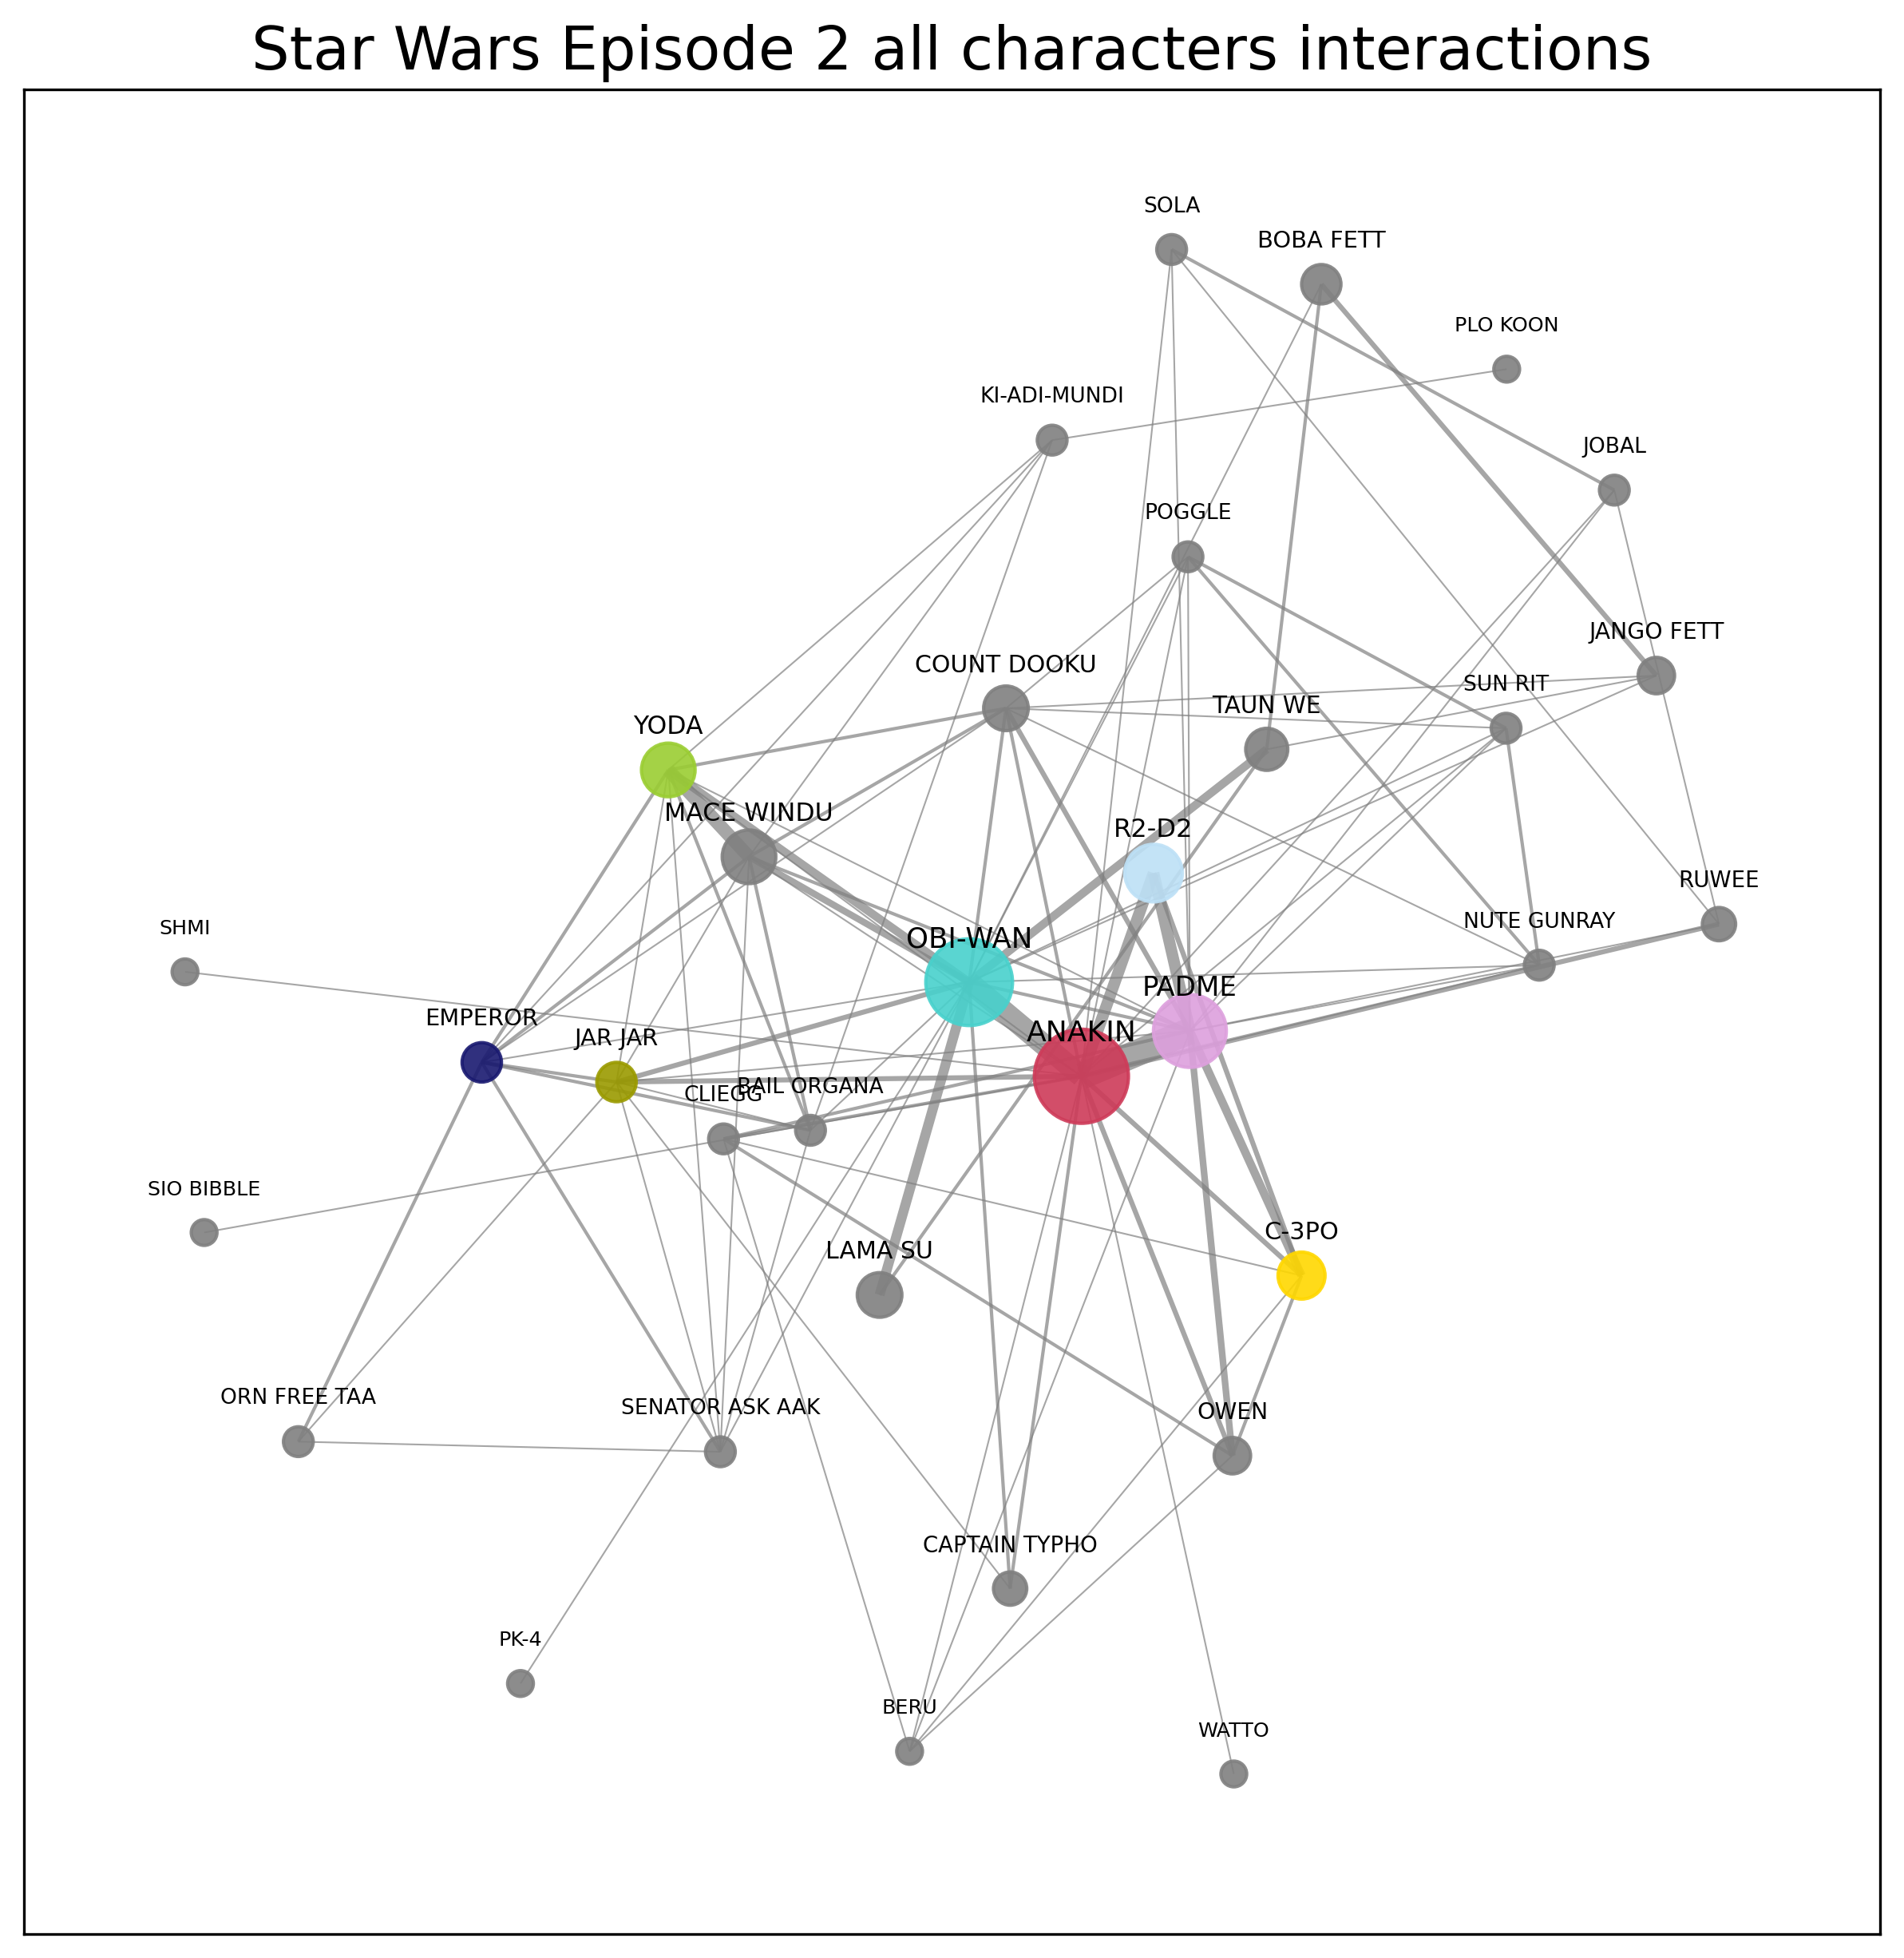

In [164]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10), dpi = 300)
nx.draw_networkx_nodes(G, 
                       pos = pos,
                       alpha = 0.9, 
                       ax = ax,
                       node_size = node_sizes,
                       node_color= node_colors.values())

nx.draw_networkx_edges(G, pos=pos, width=np.array([w for w in edge_weights.values()]) / 2, edge_color="gray", alpha=0.7, ax=ax)

for i, (node, (x, y)) in enumerate(pos.items()):
    ax.text(x, y + 0.05, node_names[i], fontsize = 5 + np.log(node_values[i]), ha = "center", va = "center")

ax.set_title("Star Wars Episode 2 all characters interactions", fontsize=18)